In [1]:
from Backtest import Backtest,Position,Bid
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("test_data.csv",index_col=[0])
data.index = pd.to_datetime(data.index)
data.tail(5)

,cat,mcd,etsy,twtr,kmi,gme,celg,wdc,ups,nflx,...,ms,abt,jpm,lb,rad,bbby,nvda,biib,aal,vz
2019-04-30 16:26:00,133.262,189.063,68.03,39.90,18.1844,8.65,94.845,49.2311,100.187,370.30,...,46.1315,77.4098,110.1290,24.1604,9.150,15.6860,181.479,229.240,33.7771,53.0964
2019-04-30 16:27:00,132.611,189.418,67.54,39.90,18.1844,8.65,94.845,49.2311,100.187,370.63,...,46.1315,77.4098,109.5430,24.1604,9.150,15.6860,181.379,229.240,33.7278,53.0964
2019-04-30 16:28:00,132.611,189.418,67.54,39.81,18.1844,8.65,94.845,49.6630,100.187,370.62,...,46.1315,77.4098,109.5240,24.1604,9.150,15.6860,181.180,242.082,33.7278,53.0964
2019-04-30 16:29:00,132.611,189.063,67.54,39.81,18.0496,8.65,94.845,49.2119,100.404,370.30,...,42.4886,76.7842,99.2186,24.2170,9.160,15.6860,181.379,242.082,33.1259,52.9665
2019-04-30 16:30:00,132.611,189.063,67.65,39.92,18.0496,9.76,94.845,48.8954,100.404,370.31,...,42.4886,76.7842,99.2186,24.2170,11.944,17.1326,181.777,242.082,33.1259,54.2829


In [3]:
def buy_declining(ti,df,positions,cash):
    
    bid_list = []
    if ti.minute % 10 == 0 and ti.hour != 16:
        print(ti)
        #find growing stock
        
        window = df.diff().lt(0).iloc[-3:,:].sum(axis = 0)
        tickers = list(window[window==3].keys())
        if len(tickers) > 0:
            print(tickers)
            weight = cash/len(tickers)
            for ticker in tickers:
                price = df.iloc[-1][ticker]
                bid = Bid(ticker = ticker, shares = weight//price, price = price,bid_type = 1)
                bid_list.append(bid)
        
        
        
    
    if ti.minute % 10 == 1:
        for pos in positions.values():
            #ticker
            ticker = pos.ticker
            #latest price
            price = df.iloc[-1][pos.ticker]
            #shares held in current position
            shares_held = pos.shares

            bid = Bid(ticker = ticker,shares = shares_held,price = price,bid_type = 0)
            bid_list.append(bid)
    return bid_list

In [4]:
def buy_growing(ti,df,positions,cash):
    
    bid_list = []
    if ti.minute % 10 == 0 and ti.hour != 16:
        print(ti)
        #find growing stock
        
        window = df.diff().gt(0).iloc[-3:,:].sum(axis = 0)
        tickers = list(window[window==3].keys())
        if len(tickers) > 0:
            print(tickers)
            weight = cash/len(tickers)
            for ticker in tickers:
                price = df.iloc[-1][ticker]
                bid = Bid(ticker = ticker, shares = weight//price, price = price,bid_type = 1)
                bid_list.append(bid)
        
        
        
    
    if ti.minute % 10 == 1:
        for pos in positions.values():
            #ticker
            ticker = pos.ticker
            #latest price
            price = df.iloc[-1][pos.ticker]
            #shares held in current position
            shares_held = pos.shares

            bid = Bid(ticker = ticker,shares = shares_held,price = price,bid_type = 0)
            bid_list.append(bid)
    return bid_list

In [5]:
d = {1:2,3:4}
for i,j in d.items():
    print(i,j)

1 2
3 4


In [6]:
bt_growing = Backtest(data,buy_growing, has_tc = False)
bt_growing.backtest_full()

2019-04-01 09:30:00
2019-04-01 09:40:00
['mcd', 'gme', 'amd', 'tsla', 'xom', 'ko', 't', 'stx', 'pg', 'o', 'wmt', 'tgt', 'dis', 'wft', 'ma', 'cnc', 'vz']
2019-04-01 09:50:00
['celg', 'wdc', 'avgo', 'mgm', 'brk', 'stx', 'mchp', 'csx', 'luv', 'abbv', 'orcl', 'ci', 'amat']
2019-04-01 10:00:00
2019-04-01 10:10:00
['cat', 'etsy', 'ups', 'nflx', 'cmcsa', 'txn', 'clf', 'oxy', 'amd', 'rtn', 'cmg', 'ba', 'fdx', 'xlnx', 'amgn', 'antm', 'mro', 'avgo', 'ea', 'fcx', 'utx', 'qcom', 'wba', 'fisv', 'hal', 'adi', 'ttwo', 'mpc', 'stx', 'lrcx', 'unp', 'cdns', 'swks', 'isrg', 'csco', 'swn', 'apc', 'unh', 'ge', 'lmt', 'hon', 'slb', 'kr', 'amzn', 'wm', 'ibm', 'ebay', 'mu', 'wfc', 'mat', 'atvi', 'cop', 'spy', 'amat', 'nvda']
2019-04-01 10:20:00
['mcd', 'celg', 'ea', 'aapl', 'gis', 'wmt', 'amzn', 'wm', 'nem', 'ctl']
2019-04-01 10:30:00
['twtr', 'tgt', 'abbv', 'wm', 'sbux', 'biib']
2019-04-01 10:40:00
['mmm', 'ual', 'enph', 'swn', 'gild', 'gs', 'aal']
2019-04-01 10:50:00
['wdc', 'tsla', 'uri', 'vlo', 'fdx', 'an

2019-04-02 14:40:00
['gme', 'algn', 'uri', 'anet', 'ko', 'gm', 'gild', 'uaa']
Not enough cash to build a position for uaa
2019-04-02 14:50:00
['ups', 'uri', 'fdx', 'brk', 'c', 'mpc', 'gild', 'dal', 'x', 'gs', 'abbv', 'wm', 'nem', 'cvs', 'biib']
2019-04-02 15:00:00
['algn', 'isrg', 'ma', 'cvs']
2019-04-02 15:10:00
['mcd', 'dd', 'gis', 'lmt', 'adbe', 'mat']
Not enough cash to build a position for mat
2019-04-02 15:20:00
['mo', 'pcg', 'hd', 'avgo', 'ko', 'lly', 'stz', 'isrg', 'gis', 'x', 'jnj']
2019-04-02 15:30:00
['celg', 'cmg', 'mo', 'mgm', 'c', 'wynn', 'x', 'ma']
2019-04-02 15:40:00
['etsy', 'wdc', 'amd', 'dd', 'now', 'dal', 'luv', 'pm', 'fb', 'mu', 'ctl']
Not enough cash to build a position for ctl
2019-04-02 15:50:00
['mro', 'utx', 'unh', 'x', 'cvs', 'nvda']
2019-04-03 09:30:00
2019-04-03 09:40:00
['oxy', 'rtn', 'amgn', 'antm', 'tmus', 'pep', 't', 'mrk', 'pg', 'gild', 'csx', 'ge', 'lmt', 'hon', 'pm', 'slb', 'bmy', 'wm', 'nke', 'abt']
Not enough cash to build a position for abt
2019-0

2019-04-04 10:20:00
['etsy', 'anet', 'xlnx', 'ea', 'fisv', 'cdns', 'csco', 'adbe', 'crm', 'intu', 'abt', 'nvda', 'biib']
Not enough cash to build a position for biib
2019-04-04 10:30:00
['cat', 'twtr', 'kmi', 'celg', 'wdc', 'ups', 'algn', 'cmcsa', 'txn', 'clf', 'oxy', 'amd', 'uri', 'cmg', 'cvx', 'anet', 'fdx', 'xlnx', 'hpe', 'axp', 'amgn', 'mro', 'ea', 'fcx', 'utx', 'bac', 'qcom', 'aapl', 'lly', 'fisv', 'c', 'v', 'mrk', 'low', 'cdns', 'mchp', 'swks', 'isrg', 'csco', 'gild', 'apc', 'dal', 'unh', 'gs', 'hon', 'adbe', 'slb', 'fb', 'abbv', 'amzn', 'wm', 'ibm', 'sbux', 'ebay', 'orcl', 'nke', 'mu', 'intu', 'dis', 'pypl', 'wfc', 'ma', 'atvi', 'cop', 'spy', 'msft', 'cvs', 'ms', 'abt', 'jpm', 'rad', 'nvda', 'aal']
2019-04-04 10:40:00
['oxy', 'pcg', 'ba', 'lly', 'gild', 'apc', 'o', 'lmt', 'jnj', 'bsx', 'wft', 'cnc', 'abt', 'biib']
Not enough cash to build a position for biib
2019-04-04 10:50:00
['amgn', 'brk', 'pep', 'wmt', 'jnj', 'nem', 'lb']
2019-04-04 11:00:00
['etsy', 'nflx', 'oxy', 'mmm', '

2019-04-05 14:30:00
['nflx', 'vlo', 'ilmn', 'irm', 'm', 'kss', 'csco', 'o', 'wmt', 'jnj', 'uaa', 'nvda']
2019-04-05 14:40:00
['wba', 'kr', 'wm', 'biib']
Not enough cash to build a position for biib
2019-04-05 14:50:00
['ups', 'nflx', 'oxy', 'amd', 'uri', 'cmg', 'ilmn', 'antm', 'fcx', 'wba', 'hal', 'chk', 'mchp', 'enph', 'wmt', 'intu', 'lb', 'biib']
Not enough cash to build a position for biib
2019-04-05 15:00:00
['ups', 'uri', 'ba', 'fdx', 'lly', 'unp', 'pg', 'csx', 'x', 'gs', 'adbe', 'kr', 'crm', 'bmy', 'mat', 'nvda']
Not enough cash to build a position for nvda
2019-04-05 15:10:00
['ups', 'algn', 'amd', 'vlo', 'ilmn', 'antm', 'ea', 'ttwo', 'stx', 'lrcx', 'unp', 'low', 'chk', 'adbe', 'jnj', 'kr', 'uaa', 'nwl', 'bmy', 'orcl', 'nke', 'mu', 'googl', 'atvi', 'cop', 'abt', 'jpm', 'biib', 'aal']
2019-04-05 15:20:00
['nem', 'ctl']
2019-04-05 15:30:00
['etsy', 'nflx', 'antm', 'avgo', 'khc']
2019-04-05 15:40:00
['anet', 'antm', 'wba', 'aapl', 'now', 'pep', 'pg', 'cdns', 'gis', 'adbe', 'pm', 'j

2019-04-09 12:30:00
['x', 'bmy', 'intu', 'rad']
2019-04-09 12:40:00
['cat', 'txn', 'ilmn', 'amgn', 'fcx', 'dd', 'mgm', 'brk', 'aapl', 'pep', 'stz', 'v', 'isrg', 'csco', 'gs', 'crm', 'bmy', 'ibm', 'sbux', 'pypl', 'jpm', 'biib']
Not enough cash to build a position for biib
2019-04-09 12:50:00
['cvx', 'vlo', 'fisv', 'hal', 'v', 'wynn', 'cdns', 'gild', 'adbe', 'crm', 'pypl', 'wft', 'ma', 'mat']
Not enough cash to build a position for mat
2019-04-09 13:00:00
['cat', 'ups', 'cmcsa', 'oxy', 'uri', 'xom', 'cvx', 'xlnx', 'goog', 'utx', 'bac', 'qcom', 'mgm', 'brk', 'ko', 'aapl', 'stz', 'adi', 'gm', 't', 'c', 'v', 'mpc', 'lrcx', 'unp', 'wynn', 'swks', 'isrg', 'pfe', 'kss', 'x', 'o', 'cost', 'pm', 'tgt', 'dnr', 'abbv', 'sbux', 'orcl', 'ci', 'dis', 'pypl', 'atvi', 'cop', 'spy', 'cvs', 'jpm']
2019-04-09 13:10:00
['etsy', 'cmg', 'anet', 'ba', 'amgn', 'now', 'hal', 'gild', 'fb']
2019-04-09 13:20:00
['kmi', 'cvx', 'anet', 'vlo', 'hd', 'mro', 'now', 'c', 'low', 'apc', 'o', 'tgt', 'ci', 'cop', 'ms', 'jpm

2019-04-11 10:40:00
['tmus', 'm', 'kss', 'dis', 'lb', 'vz']
Not enough cash to build a position for vz
2019-04-11 10:50:00
['cmg', 'pcg', 'axp', 'amgn', 'avgo', 'pep', 'ci']
2019-04-11 11:00:00
['cat', 'oxy', 'mro', 'wba', 'lly', 'rig', 'gm', 'swn', 'gild', 'luv', 'slb', 'abbv', 'ci', 'wfc', 'cvs', 'biib', 'aal']
Not enough cash to build a position for aal
2019-04-11 11:10:00
['kmi', 'oxy', 'tsla', 'ba', 'goog', 'irm', 'hal', 'o', 'amzn', 'sbux', 'ebay']
Not enough cash to build a position for ebay
2019-04-11 11:20:00
['ups', 'oxy', 'mro', 'gm', 'c', 'gis', 'gs', 'slb', 'fb', 'cop', 'ms']
2019-04-11 11:30:00
['txn', 'amd', 'uri', 'rtn', 'vlo', 'ba', 'fdx', 's', 'antm', 'utx', 'dd', 'aapl', 'stz', 'mrk', 'stx', 'lrcx', 'unp', 'swks', 'unh', 'abbv', 'intc', 'intu', 'dis', 'googl', 'pypl', 'wfc', 'msft', 'amat']
Not enough cash to build a position for amat
2019-04-11 11:40:00
['cat', 'etsy', 'twtr', 'wdc', 'ups', 'nflx', 'algn', 'txn', 'clf', 'mmm', 'amd', 'tsla', 'rtn', 'cmg', 'hpq', 'mo

2019-04-12 14:20:00
['algn', 'oxy', 'xom', 'anet', 'ilmn', 'antm', 'mro', 'wba', 'khc', 'm', 'kss', 'adbe', 'amzn', 'ma', 'cop']
2019-04-12 14:30:00
['xom', 'mrk']
2019-04-12 14:40:00
['gme', 'antm', 'ttwo', 'unh', 'cnc']
2019-04-12 14:50:00
['etsy', 'uri', 'cvx', 'mro', 'brk', 'gm', 'low', 'cop']
2019-04-12 15:00:00
['etsy', 'gme', 'mmm', 'pfe', 'ebay', 'nem', 'atvi', 'cvs']
2019-04-12 15:10:00
2019-04-12 15:20:00
['etsy', 'algn', 'txn', 'amd', 'tsla', 'ba', 'goog', 'ea', 'aapl', 'hal', 'kss', 'x', 'slb', 'jnj', 'kr', 'crm', 'amzn', 'googl', 'spy', 'amat', 'ms', 'abt']
2019-04-12 15:30:00
['ups', 'ba', 'fdx', 'ilmn', 'hal', 'gm', 'wynn', 'csx', 'gs', 'ms']
2019-04-12 15:40:00
['mcd', 'pcg', 'unh', 'gs']
Not enough cash to build a position for gs
2019-04-12 15:50:00
['etsy', 'oxy', 'uri', 'mo', 'vlo', 'hd', 'aks', 'gild', 'lmt', 'pm', 'slb', 'ebay', 'pypl', 'wfc', 'amat']
Not enough cash to build a position for amat
2019-04-15 09:30:00
['pcg']
2019-04-15 09:40:00
['nflx', 'fdx', 'antm'

2019-04-16 12:20:00
['cat', 'amd', 'tsla', 'fdx', 'xlnx', 'hd', 'ea', 'lly', 'khc', 'low', 'pg', 'csx', 'gis', 'cost', 'slb', 'nvda']
2019-04-16 12:30:00
['etsy', 'gme', 'mo', 'mro', 'bac', 'brk', 'c', 'chk', 'isrg', 'bsx', 'ma', 'jpm']
Not enough cash to build a position for jpm
2019-04-16 12:40:00
['xom', 'cvx', 'amgn', 'mro', 'pep', 'mpc', 'isrg', 'apc', 'abbv', 'bmy', 'bsx', 'cop', 'ms']
Not enough cash to build a position for ms
2019-04-16 12:50:00
['ko', 'gis']
Not enough cash to build a position for gis
2019-04-16 13:00:00
['algn', 'mmm', 'hd', 'utx', 'qcom', 'tmus', 'wynn', 'x', 'tgt', 'kr', 'aal']
Not enough cash to build a position for aal
2019-04-16 13:10:00
['kmi', 'celg', 'algn', 'cvx', 'ba', 'ual', 'pep', 'stz', 't', 'isrg', 'gild', 'pm', 'nwl', 'lb', 'aal']
Not enough cash to build a position for aal
2019-04-16 13:20:00
['pcg', 'ilmn', 'lly', 'mrk', 'unh', 'cost', 'adbe', 'ci', 'ma']
2019-04-16 13:30:00
['twtr', 'mo', 'ba', 'hd', 'pep', 'lly', 'ttwo', 'adbe', 'fb', 'crm'

2019-04-18 10:10:00
['amd', 'tsla', 'rtn', 'mo', 'cvx', 'amgn', 'utx', 'tmus', 'now', 'x', 'o', 'cost', 'kr', 'abbv', 'bsx', 'ebay', 'ma', 'atvi', 'spy', 'abt', 'nvda']
Not enough cash to build a position for nvda
2019-04-18 10:20:00
['cat', 'twtr', 'gme', 'nflx', 'algn', 'anet', 'xlnx', 'ilmn', 'fisv', 'hal', 'adi', 'ttwo', 'unp', 'wynn', 'cdns', 'mchp', 'pfe', 'gild', 'dal', 'csx', 'cost', 'adbe', 'slb', 'jnj', 'fb', 'kr', 'crm', 'uaa', 'amzn', 'nke', 'mat', 'atvi', 'nvda', 'biib']
Not enough cash to build a position for biib
2019-04-18 10:30:00
['xom', 'mchp', 'cost', 'aal']
2019-04-18 10:40:00
['mmm', 'xlnx', 'amgn', 'goog', 'utx', 'aapl', 'now', 'fisv', 'v', 'mrk', 'csco', 'adbe', 'slb', 'jnj', 'intc', 'amzn', 'bsx', 'pypl', 'spy', 'msft']
2019-04-18 10:50:00
['kmi', 'uri', 'bac', 'fb', 'amat', 'jpm', 'rad']
Not enough cash to build a position for rad
2019-04-18 11:00:00
['celg', 'ea', 'f', 'lly', 'irm', 'hal', 'mrk', 'unh', 'cost', 'abbv', 'bmy', 'ci', 'cnc', 'atvi', 'cvs', 'ctl'

2019-04-22 14:20:00
['cat', 'gme', 'wdc', 'ual', 'dd', 'dal', 'cost', 'wmt', 'hon', 'pm', 'wfc', 'jpm']
2019-04-22 14:30:00
['cat', 'wdc', 'ups', 'tsla', 'uri', 'mo', 'fdx', 'xlnx', 'axp', 'hd', 'avgo', 'ko', 'aapl', 'pep', 'adi', 'c', 'stx', 'lrcx', 'khc', 'wynn', 'csx', 'gis', 'o', 'tgt', 'intc', 'wm', 'nke', 'mu', 'aal']
2019-04-22 14:40:00
['cmcsa', 'tsla', 'cvx', 'goog', 'ea', 'hal', 'mchp', 'cost', 'amzn', 'ebay', 'ci', 'googl', 'cnc', 'amat']
2019-04-22 14:50:00
['tsla', 'uri', 'qcom', 'irm', 'x', 'ci', 'wfc', 'cnc', 'jpm', 'rad']
2019-04-22 15:00:00
['ups', 'txn', 'utx', 'dd', 'now', 'hal', 'unp', 'mchp', 'swks', 'gis', 'cost', 'fb', 'crm', 'intc', 'nke', 'intu', 'googl', 'pypl', 'aal']
2019-04-22 15:10:00
['nflx', 'dd', 'mgm', 'o', 'googl']
2019-04-22 15:20:00
['xom', 'avgo', 'mrk', 'fb']
2019-04-22 15:30:00
['mcd', 'amd', 'xlnx', 'qcom', 'now', 'adi', 'gm', 'c', 'swks', 'x', 'slb', 'uaa', 'mu', 'wft', 'ms', 'nvda']
Not enough cash to build a position for nvda
2019-04-22 15:40

2019-04-24 11:40:00
['txn', 'uri', 'avgo', 'mchp', 'slb', 'fb', 'intc', 'mu']
2019-04-24 11:50:00
['celg', 'txn', 'mo', 'anet', 'ual', 'qcom', 'tmus', 'stz', 'adi', 'gm', 't', 'c', 'stx', 'khc', 'wynn', 'pg', 'gis', 'x', 'gs', 'pm', 'bmy', 'ci', 'nem', 'atvi', 'abt']
Not enough cash to build a position for abt
2019-04-24 12:00:00
['celg', 'txn', 'uri', 'antm', 'tmus', 'gm', 't', 'mpc', 'stx', 'khc', 'unp', 'gild', 'unh', 'gs', 'hon', 'intc']
Not enough cash to build a position for intc
2019-04-24 12:10:00
['cmg', 'mro', 'isrg', 'bsx', 'sbux']
Not enough cash to build a position for sbux
2019-04-24 12:20:00
['oxy', 'uri', 'xom', 'cvx', 'pcg', 'utx', 'brk', 'fisv', 'v', 'gis', 'slb', 'ma', 'cop', 'vz']
Not enough cash to build a position for vz
2019-04-24 12:30:00
['oxy', 'vlo', 'goog', 'mro', 'bac', 'hal', 'mpc', 'low', 'slb', 'ebay', 'googl', 'wft', 'cnc', 'lb', 'bbby', 'nvda']
Not enough cash to build a position for nvda
2019-04-24 12:40:00
['mcd', 'twtr', 'goog', 'tmus', 'brk', 't', 

2019-04-25 15:20:00
['xlnx', 'antm', 'avgo', 'fcx', 'wba', 'mchp', 'cvs']
2019-04-25 15:30:00
['ba', 'tmus', 'aapl', 'lmt', 'ms']
2019-04-25 15:40:00
['vlo', 'ba', 'xlnx', 'c', 'unh']
Not enough cash to build a position for unh
2019-04-25 15:50:00
['kmi', 'oxy', 'cmg', 'mo', 'hpe', 'mro', 'avgo', 'hal', 'ttwo', 't', 'mpc', 'csco', 'gs', 'fb', 'intc', 'msft', 'nvda']
Not enough cash to build a position for nvda
2019-04-26 09:30:00
['intc', 'sbux', 'mat']
2019-04-26 09:40:00
['etsy', 'txn', 'tsla', 'hpq', 'xlnx', 'ilmn', 'hpe', 'qcom', 'rig', 'ttwo', 'v', 'stx', 'lrcx', 'm', 'enph', 'apc', 'adbe', 'dnr', 'crm', 'orcl', 'mu', 'cnc', 'nvda']
2019-04-26 09:50:00
['algn', 'pcg', 'amgn', 'pep', 'lly', 'stz', 'mrk', 'pg', 'pfe', 'o', 'wmt', 'jnj', 'abbv', 'abt']
Not enough cash to build a position for abt
2019-04-26 10:00:00
['axp', 'aks', 'm', 'uaa']
2019-04-26 10:10:00
['ups', 'mmm', 'uri', 'rtn', 'ba', 'hd', 'fcx', 'bac', 'gm', 'khc', 'm', 'swks', 'cost', 'lmt', 'gs', 'kr', 'dis', 'wfc', 'm

2019-04-29 12:40:00
['rtn', 'xom', 'axp', 'dd', 'ko', 'pep', 'mrk', 'fb', 'bmy', 'intc', 'ibm', 'wfc', 'ma']
Not enough cash to build a position for ma
2019-04-29 12:50:00
['abbv', 'bmy']
2019-04-29 13:00:00
['cat', 'txn', 'mo', 'anet', 'ilmn', 'goog', 'avgo', 'ttwo', 'mchp', 'enph', 'abbv', 'uaa', 'wm', 'biib']
Not enough cash to build a position for biib
2019-04-29 13:10:00
['celg', 'tsla', 'dal', 'luv', 'pm', 'bmy']
Not enough cash to build a position for bmy
2019-04-29 13:20:00
['mcd', 'anet', 'ilmn', 'avgo', 'wynn', 'amzn', 'intu', 'pypl']
2019-04-29 13:30:00
['amd', 'ea', 'irm', 'dal', 'jnj', 'amzn']
2019-04-29 13:40:00
['cat', 'txn', 'tsla', 'ba', 'axp', 'goog', 'ea', 'fcx', 'bac', 'dd', 'brk', 'aapl', 'adi', 'gm', 'stx', 'adbe', 'fb', 'dis', 'googl', 'atvi', 'vz']
Not enough cash to build a position for vz
2019-04-29 13:50:00
['algn', 'avgo', 'pypl', 'cnc', 'biib', 'vz']
Not enough cash to build a position for vz
2019-04-29 14:00:00
['cat', 'oxy', 'amgn', 'unp', 'gild', 'luv', 

In [121]:
bt.transaction_history.loc[bt.transaction_history['pnl']>1000]

,dt,ticker,type,price,shares,amount,cash_left,transaction_cost,pnl
8387,2019-04-11 09:31:00,bbby,0,16.4652,6223.0,102462.9396,102473.5877,0.0,1351.6356


In [124]:
bt.transaction_history.loc[(bt.transaction_history['ticker'] == 'bbby') & (bt.transaction_history['dt'].dt.day == 11)]

,dt,ticker,type,price,shares,amount,cash_left,transaction_cost,pnl
8386,2019-04-11 09:30:00,bbby,1,16.2480,6223.0,101111.3040,10.6481,0.0,0.0000
8387,2019-04-11 09:31:00,bbby,0,16.4652,6223.0,102462.9396,102473.5877,0.0,1351.6356
9338,2019-04-11 14:10:00,bbby,1,16.6201,560.0,9307.2560,407.5497,0.0,0.0000
9349,2019-04-11 14:11:00,bbby,0,16.6248,560.0,9309.8880,102461.0715,0.0,2.6320


<AxesSubplot:>

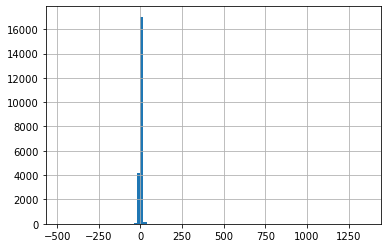

In [7]:
bt_growing.transaction_history['pnl'].hist(bins = 100)

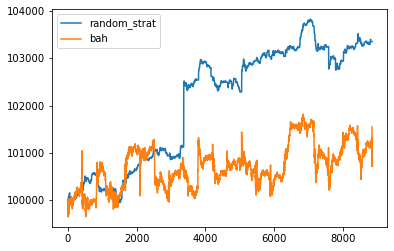

In [119]:
plt.plot(bt.portfolio_tracker['total_value'], label = 'random_strat')
plt.plot(bt.portfolio_tracker['bah'],label = 'bah')
plt.legend()